In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
import math
import numpy as np
from cv2 import Rodrigues
from math import sin, cos, atan2, sqrt
import pandas as pd
from pathlib import Path
import pyproj
from pyproj import Proj, transform
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, TimeSeriesSplit
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [47]:
df = pd.read_csv('/kaggle/input/dataset1/Gia SMP va SMPcap 2021(Gi th trng SMP).csv', encoding='latin-1', sep=';')
df.head(5)

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


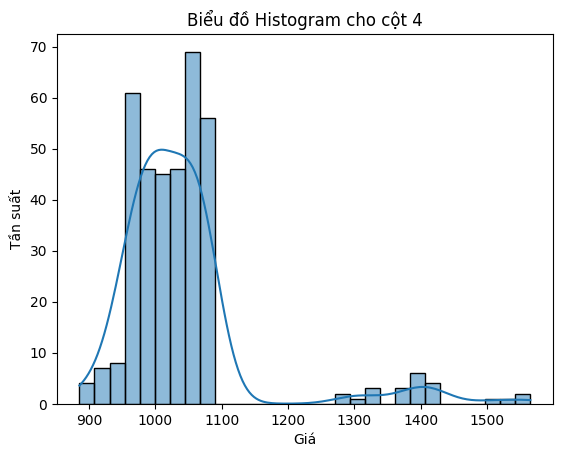

In [48]:
# Tạo biểu đồ histogram bằng seaborn
sns.histplot(df['4'], bins=30, kde=True)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Histogram cho cột 4')
plt.xlabel('Giá')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

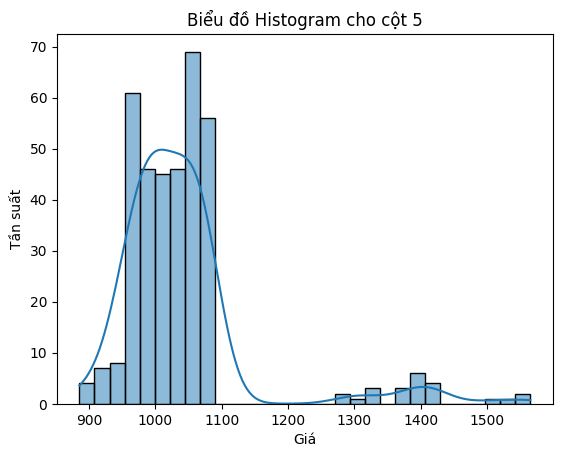

In [49]:
# Tạo biểu đồ histogram bằng seaborn
sns.histplot(df['5'], bins=30, kde=True)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Histogram cho cột 5')
plt.xlabel('Giá')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

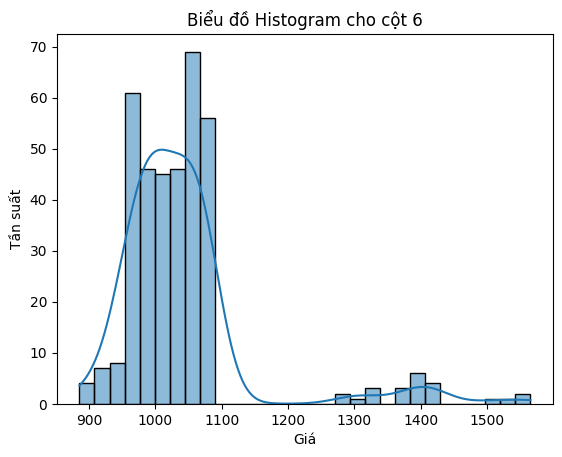

In [50]:
# Tạo biểu đồ histogram bằng seaborn
sns.histplot(df['6'], bins=30, kde=True)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Histogram cho cột 6')
plt.xlabel('Giá')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

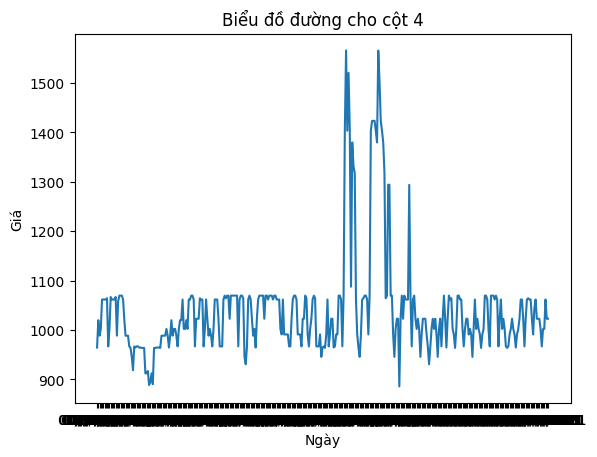

In [51]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['Ngày'], y=df['4'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 4')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Hiển thị biểu đồ
plt.show()

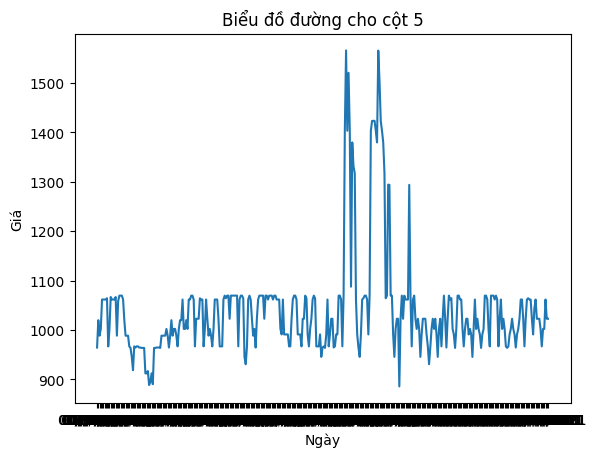

In [52]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['Ngày'], y=df['5'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 5')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Hiển thị biểu đồ
plt.show()

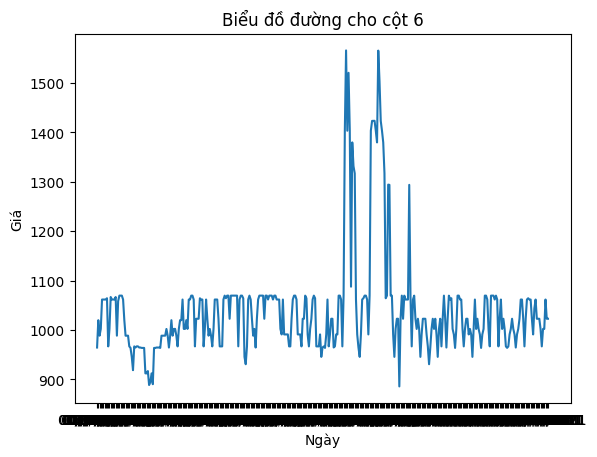

In [53]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['Ngày'], y=df['6'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 6')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Hiển thị biểu đồ
plt.show()

In [54]:

data = df[['4','5','6']]
test_size = 0.2 * data.shape[0]
test_size = int(test_size)
test_size

73

In [55]:
!pip install pykalman

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

kf = KalmanFilter(initial_state_mean=0, n_dim_obs=3)

kf = kf.em(data.values[:-test_size], n_iter=10)

state_means, state_covariances = kf.smooth(data.values[-test_size:])
state_mean, state_covariance = kf.filter(data)

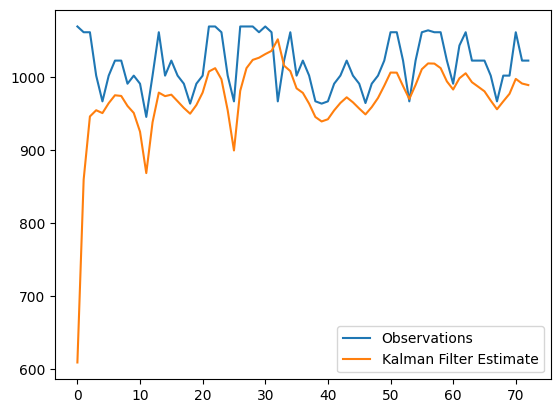

In [65]:
# Vẽ kết quả
plt.plot(data.values[-test_size:][:,0], label='Observations')
plt.plot(state_means, label='Kalman Filter Estimate')
plt.legend()
plt.show()

In [62]:
state_means.shape

(73, 1)

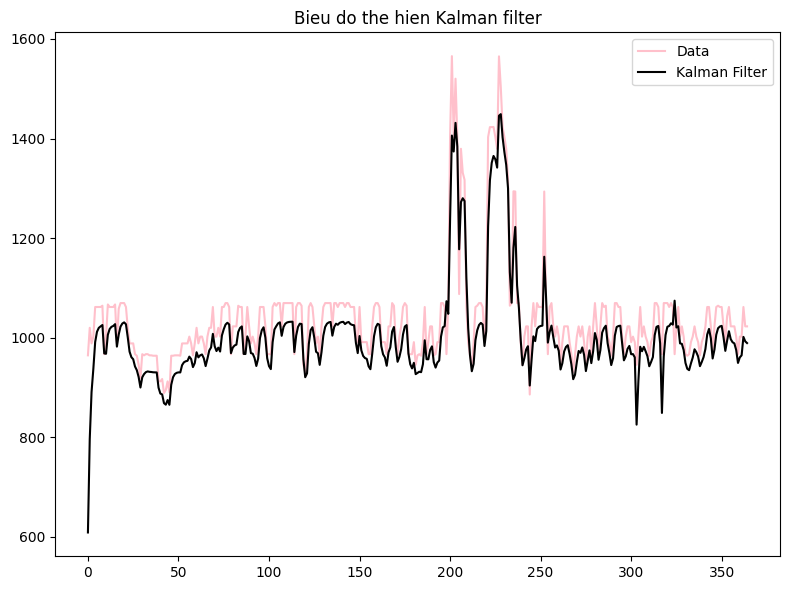

In [76]:
plt.figure(figsize=(8,6))
plt.plot(range(data.shape[0]),data.iloc[:,0],'pink',label='Data')
plt.plot(range(data.shape[0]),state_mean[:,0],'black',label='Kalman Filter')
plt.title(f'Bieu do the hien Kalman filter')
plt.legend()
plt.tight_layout()
plt.show()

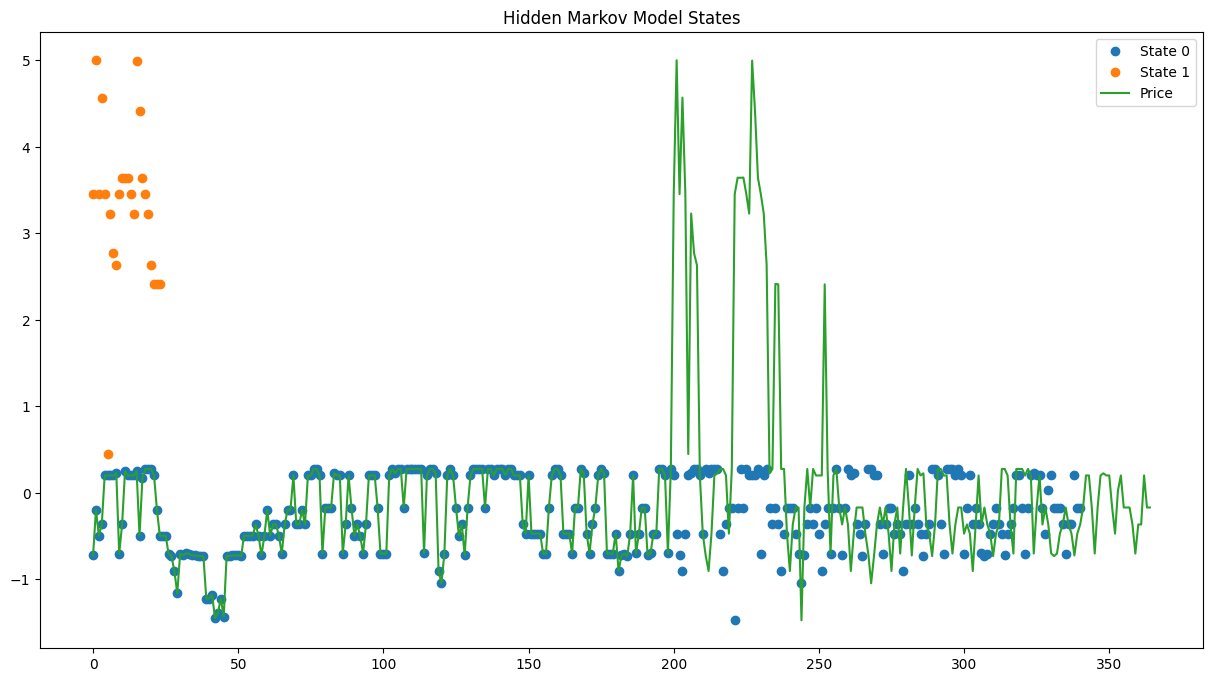

In [80]:
from hmmlearn import hmm
# Assuming your data has columns 'Price1', 'Price2', 'Price3'
prices = df[['4']].values

# Normalize the data
prices = (prices - np.mean(prices, axis=0)) / np.std(prices, axis=0)

# Define the HMM model
model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=100)

# Fit the model
model.fit(prices)

# Predict hidden states
hidden_states = model.predict(prices)

# Plot the results
plt.figure(figsize=(15, 8))
for i in range(model.n_components):
    state = (hidden_states == i)
    plt.plot(prices[state, 0], 'o', label=f'State {i}')
plt.plot(prices[:, 0], label='Price')
plt.legend()
plt.title('Hidden Markov Model States')
plt.show()

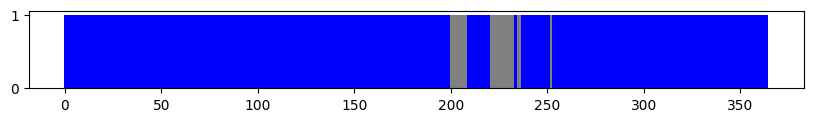

In [75]:
state2color = {} 
state2color['0'] = 'blue'
state2color['1'] = 'grey'

def plot_weather_samples(samples, state2color): 
    colors = [state2color[str(x)] for x in samples]
    x = np.arange(0, len(colors))
    y = np.ones(len(colors))
    plt.figure(figsize=(10,1))
    plt.bar(x, y, color=colors, width=1)
    
plot_weather_samples(hidden_states, state2color)

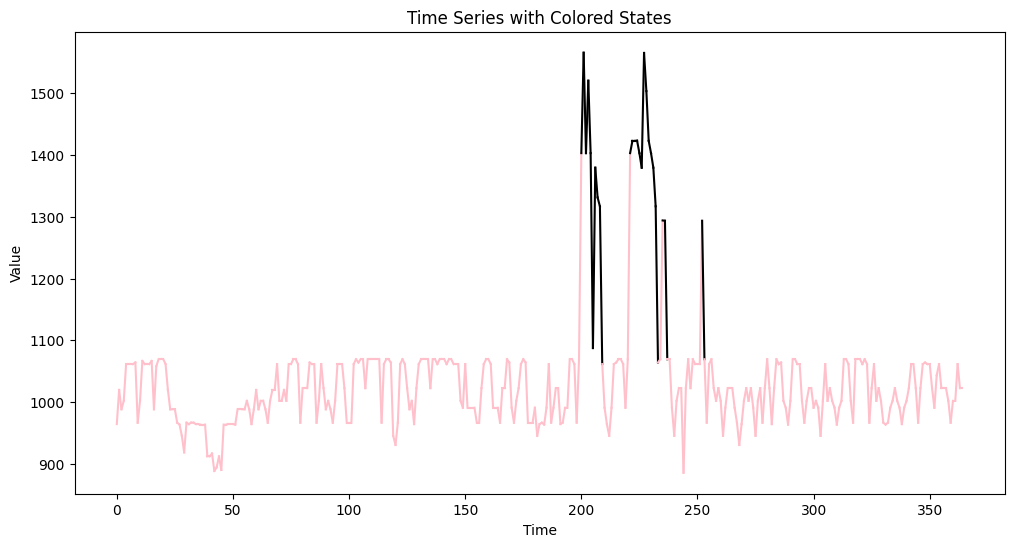

In [79]:
# Tạo một biểu đồ đường cho cột giá trị số thực
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ đường với màu sắc dựa trên giá trị số nguyên
for i in range(len(data) - 1):
    plt.plot(data.index[i:i+2], data['4'][i:i+2], color='pink' if hidden_states[i] == 0 else 'black')

# Thiết lập nhãn và tiêu đề
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series with Colored States')
plt.show()